In [1]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data=train.append(test)[train.columns.tolist()]

In [2]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
import tensorflow
import keras

In [36]:
print (len(test))

1459


In [60]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [61]:
data.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

They are the main factors affecting boston house price 
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [62]:
data=data.drop('Id')
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
data.corr(method='pearson')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [64]:
pearson = data.corr(method='pearson')
# assume target attr is the last, then 
#remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
#predictivity = corr_with_target.sort(ascending=False)

/home/cruiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [65]:
corr_with_target[abs(corr_with_target).argsort()[::-1]]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

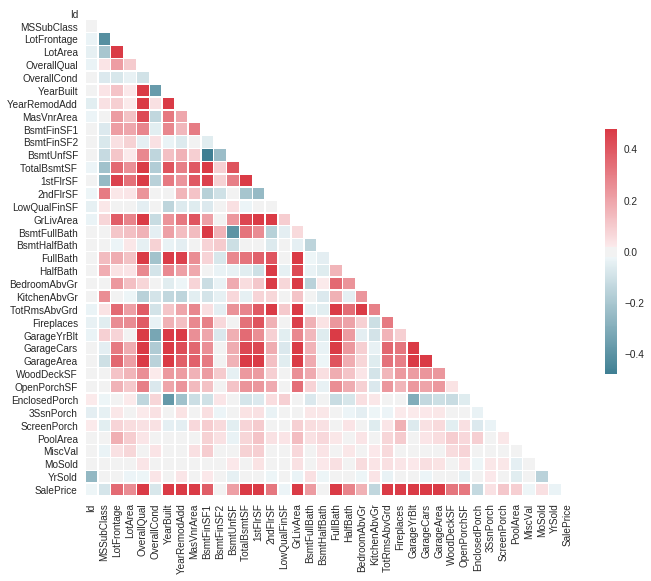

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.008931    -0.027549 -0.040746    -0.029771   
MSSubClass     0.008931    1.000000    -0.417359 -0.201730     0.033638   
LotFrontage   -0.027549   -0.417359     1.000000  0.489896     0.217645   
LotArea       -0.040746   -0.201730     0.489896  1.000000     0.100541   
OverallQual   -0.029771    0.033638     0.217645  0.100541     1.000000   
OverallCond   -0.002839   -0.065625    -0.075508 -0.035617    -0.093847   
YearBuilt     -0.016581    0.034409     0.122811  0.024128     0.597554   
YearRemodAdd  -0.050438    0.043315     0.091557  0.021612     0.571532   
MasVnrArea    -0.025219    0.005433     0.221079  0.125596     0.432947   
BsmtFinSF1    -0.016947   -0.064311     0.219408  0.194031     0.281810   
BsmtFinSF2     0.018251   -0.072530     0.047431  0.084059    -0.042771   
BsmtUnfSF     -0.014453   -0.125994     0.113714  0.021362     0.275175   
TotalBsmtSF   -0.024924  

In [66]:
import seaborn as sns # just a conventional alias, don't know why
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="white")

# Generate a large random dataset


# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
print (corr)

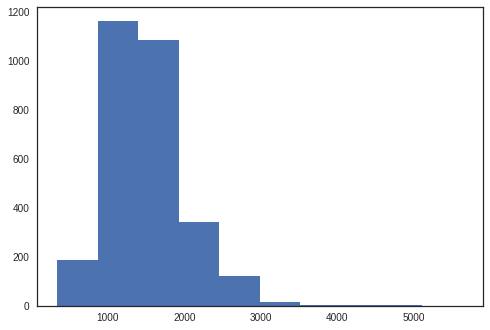

In [67]:
import matplotlib.pyplot as plt
attr = data.GrLivArea
plt.hist(attr)
plt.show()

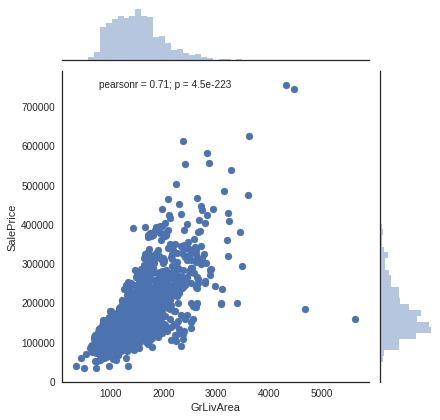

In [68]:
sns.jointplot(data.GrLivArea, data.SalePrice, kind='scatter')
plt.show()

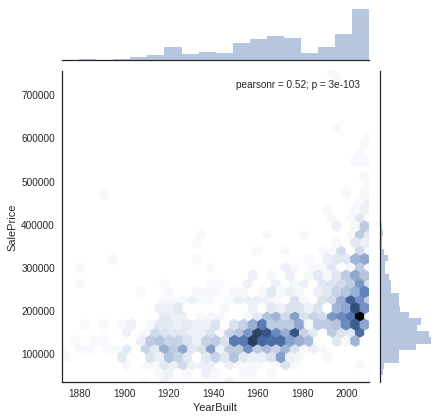

In [69]:
sns.jointplot(data.YearBuilt, data.SalePrice, kind='hex')
plt.show()

In [73]:
numeric_columns = [col for col in data.columns if (col not in ('Id', 'MSSubClass')) and (data[col].dtype in ('int64', 'float64'))]
data = data[numeric_columns]
# 去除包含NAN的数据点
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 36 columns):
LotFrontage      1121 non-null float64
LotArea          1121 non-null int64
OverallQual      1121 non-null int64
OverallCond      1121 non-null int64
YearBuilt        1121 non-null int64
YearRemodAdd     1121 non-null int64
MasVnrArea       1121 non-null float64
BsmtFinSF1       1121 non-null float64
BsmtFinSF2       1121 non-null float64
BsmtUnfSF        1121 non-null float64
TotalBsmtSF      1121 non-null float64
1stFlrSF         1121 non-null int64
2ndFlrSF         1121 non-null int64
LowQualFinSF     1121 non-null int64
GrLivArea        1121 non-null int64
BsmtFullBath     1121 non-null float64
BsmtHalfBath     1121 non-null float64
FullBath         1121 non-null int64
HalfBath         1121 non-null int64
BedroomAbvGr     1121 non-null int64
KitchenAbvGr     1121 non-null int64
TotRmsAbvGrd     1121 non-null int64
Fireplaces       1121 non-null int64
GarageYrBlt      1121 non-

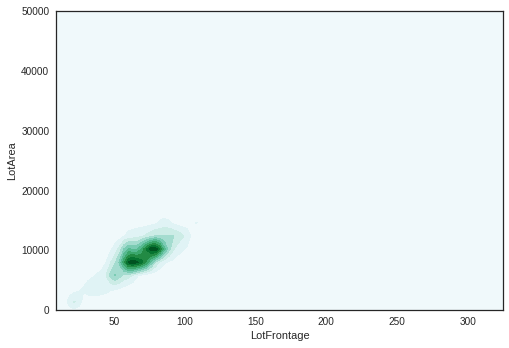

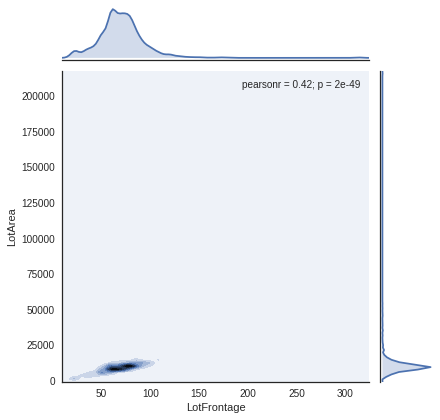

In [81]:
kde = sns.kdeplot(data.LotFrontage, data.LotArea, shade =True)
kde.set(ylim=(0, 50000))
# or 
sns.jointplot(data.LotFrontage, data.LotArea, kind='kde')
plt.show()

In [82]:
len(data.columns)

36

In [173]:
from keras.wrappers.scikit_learn import KerasRegressor

# sklearn imports:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import sklearn.model_selection
X = data.drop('SalePrice',1)
Y = data.SalePrice
# standarlize the input
scaler=StandardScaler()
normal_X = scaler.fit_transform(X)
normal_Y = scaler.fit_transform(Y)

x_train, x_test, y_train,y_test=sklearn.model_selection.train_test_split(normal_X,normal_Y,test_size=0.33, random_state=4)


#print "X: ", X
#print "Y: ", Y
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation

# build regression network
input_layer = Input((35,))
output_layer = input_layer
#output_layer=Dense(35)(output_layer)
#output_layer=Dense(35)(output_layer)
output_layer = Dense(1)(output_layer)

model = Model(input_layer, output_layer)
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.sgd(lr=0.001))
# model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta())

# train
train_info = model.fit(x_train, y_train, verbose=0, epochs=1000)
# fit

/home/cruiser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/cruiser/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [174]:
print (np.sum((model.predict(x_test).ravel() - y_test)**2) / len(y_test))

0.217890054171


In [175]:
for (x,y) in zip(model.predict(x_test).ravel(),y_test):
    print (x,y)

-0.817321 -0.561932922935
-0.490833 -0.373738624083
1.59692 2.39222216229
0.00282307 -0.367711777902
-2.30163 -1.51281255232
1.68623 2.31334279947
-0.819407 -0.83780578003
0.497519 1.07541654017
-0.498319 -0.548517163336
0.229302 0.204838609306
-0.982411 -0.910127934204
-0.23345 -0.459319839855
1.20882 1.13899976738
-0.404421 -0.51838293243
-0.154149 -0.150745315381
0.162532 0.231959417121
0.0251336 -0.0675748380817
-0.405515 -0.42918560895
-0.403503 -0.608785625147
0.328455 -0.385792316446
-1.20852 -1.1994165509
0.548567 0.1747043784
-0.522942 -0.825752087668
-0.500313 -0.657000394597
0.0844589 0.281982240424
0.518285 0.377652396703
0.481484 0.427831918007
0.638179 0.186758070762
-0.795051 -0.681107779321
1.43697 2.52517438904
-0.914907 -0.789591010581
0.485779 0.0963553780451
0.195375 -0.223067469555
0.0962257 -0.0784231612077
0.425715 -0.0543157764832
1.16181 0.65685207289
-0.353774 -0.356863454776
-0.174689 -0.488248701525
-1.05591 -0.687134625502
-1.02431 -0.801644702944
0.511746 

# compare neural network with linear regression model, firslty fix it as a two layer linear model , gives gives equivalent linear model, performance is same.after adding relu, nonlieartiy boost performance

In [176]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train, y_train)
print(np.sum((linear.predict(x_test).ravel() - y_test)**2) / len(y_test))

0.21834489432


# test on more complex neural network

In [158]:
x_train

array([[ 0.59096846,  0.26102982,  1.29523378, ..., -0.14140664,
         0.61791515,  0.15308355],
       [-0.85197432, -0.13819851, -3.05194306, ..., -0.14140664,
         1.36233523, -1.3456646 ],
       [-0.43970496, -0.19727052, -0.15382517, ..., -0.14140664,
        -0.49871497,  1.65183171],
       ..., 
       [ 0.38483378,  0.18177487, -0.87835464, ..., -0.14140664,
        -1.98755513,  1.65183171],
       [-0.02743559,  0.00591258,  0.5707043 , ..., -0.14140664,
        -1.24313505,  1.65183171],
       [-2.04755549, -1.03904664, -0.15382517, ..., -0.14140664,
        -0.12650493, -1.3456646 ]])

In [216]:
input_layer = Input((35,))
output_layer = input_layer
output_layer=Dense(35,activation='relu')(output_layer)
output_layer=Dense(35,activation='relu')(output_layer)
#output_layer=Dense(35)(output_layer)

output_layer = Dense(1)(output_layer)

model = Model(input_layer, output_layer)
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.sgd(lr=0.0001))
# model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta())


train_info = model.fit(x_train, y_train, verbose=0, epochs=8000)


# fit

In [217]:
train_info.params

{'batch_size': 32,
 'do_validation': False,
 'epochs': 8000,
 'metrics': ['loss'],
 'samples': 751,
 'verbose': 0}

In [218]:
print(np.sum((model.predict(x_test).ravel() - y_test)**2) / len(y_test))

0.374246730495


In [202]:
for (x,y) in zip(model.predict(x_test).ravel(),y_test):
    print (x,y)

-0.669835 -0.561932922935
-0.431663 -0.373738624083
1.78952 2.39222216229
-0.383179 -0.367711777902
-1.60451 -1.51281255232
2.07391 2.31334279947
-0.647192 -0.83780578003
0.796039 1.07541654017
-0.591706 -0.548517163336
0.133742 0.204838609306
-1.02771 -0.910127934204
-0.468216 -0.459319839855
1.5593 1.13899976738
-0.397747 -0.51838293243
-0.182406 -0.150745315381
0.199177 0.231959417121
-0.254281 -0.0675748380817
-0.511569 -0.42918560895
-0.660512 -0.608785625147
0.207243 -0.385792316446
-1.25136 -1.1994165509
0.553319 0.1747043784
-0.752948 -0.825752087668
-0.490551 -0.657000394597
0.240536 0.281982240424
0.658277 0.377652396703
0.495654 0.427831918007
0.291055 0.186758070762
-0.462738 -0.681107779321
1.37126 2.52517438904
-0.947655 -0.789591010581
0.437471 0.0963553780451
-0.494842 -0.223067469555
-0.0902093 -0.0784231612077
0.130268 -0.0543157764832
1.43294 0.65685207289
-0.717447 -0.356863454776
-0.461269 -0.488248701525
-0.496311 -0.687134625502
-0.796309 -0.801644702944
1.17915 

In [212]:
from sklearn import ensemble
gbdt=ensemble.GradientBoostingRegressor()
train_info = gbdt.fit(x_train, y_train)
print(np.sum((gbdt.predict(x_test).ravel() - y_test)**2) / len(y_test))

0.140776448891


In [102]:
scaler = StandardScaler()
normal_X = scaler.fit_transform(X)

input_layer = Input((13,))
output_layer = input_layer
output_layer=Dense(13,activation='relu')(output_layer)
output_layer=Dense(13)(output_layer)
output_layer = Dense(1)(output_layer)

model = Model(input_layer, output_layer)
model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.sgd(lr=0.0001))
# model.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta())


train_info = model.fit(normal_X, Y, verbose=0, epochs=1000)
print(np.sum((model.predict(normal_Xtest).ravel() - y_test)**2) / len(y_test))

11.050389797384476


7.66302508893
7.623201376072263
10.46432907542364


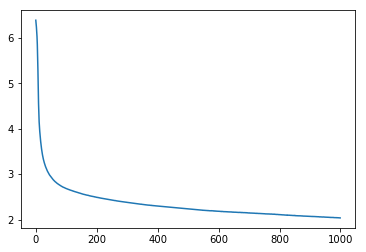

In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.log(train_info.history['loss']))
print(train_info.history['loss'][-1])
print(np.sum((model.predict(normal_X).ravel() - Y)**2) / n_points)
print(np.sum((model.predict(normal_Xtest).ravel() - y_test)**2) / len(y_test))

In [39]:
# try linear model

from sklearn import datasets, linear_model


# Before feeding the i/p into neural-network, standardise the dataset because all input variables vary in their scales
estimators = []
estimators.append(('standardise', StandardScaler()))

estimators.append(('linear', linear_model.LinearRegression()))

pipeline_linear = Pipeline(estimators)

kfold = KFold(n=len(X), n_folds=10)
results = cross_val_score(pipeline_linear, X, Y, cv=kfold)
pipeline_linear.fit(x_train,y_train)
x_train 

print ("Mean: ", results.mean())
print ("StdDev: ", results.std())

Mean:  0.200137867354
StdDev:  0.598648329344


In [40]:
results

array([ 0.73334917,  0.47229799, -1.01097697,  0.64126348,  0.54709821,
        0.73610181,  0.37761817, -0.13026905, -0.78372253,  0.41861839])

In [10]:
results

array([ 0.73334917,  0.47229799, -1.01097697,  0.64126348,  0.54709821,
        0.73610181,  0.37761817, -0.13026905, -0.78372253,  0.41861839])

In [8]:
results

array([  21.28173964,   13.88089297,   14.45867816,   65.90106239,
         40.95377   ,   33.90256123,   16.40450581,  158.95360031,
         53.4155344 ,   70.95490012])

[ 11.05039024]


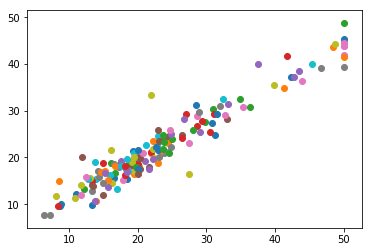

In [105]:
#neurons  it is get a bit better with neural network 
import matplotlib.pyplot as plt
#pipeline.fit(X,Y)
error=0
plt.figure()
for (i,j) in zip(y_test,model.predict(normal_Xtest)):
                 plt.scatter(i,j)
                 error+=(i-j)**2
print (error/len(x_test))
plt.show()

27.1534309004


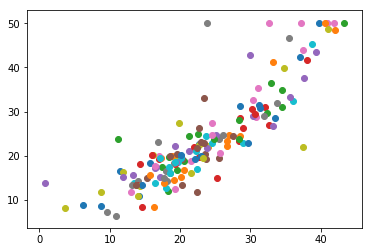

In [10]:
#neurons
pipeline_linear.fit(X,Y)

error=0
plt.figure()
for (i,j) in zip(pipeline_linear.predict(x_test),y_test):
                 plt.scatter(i,j)
                 error+=(i-j)**2
          
print (error/len(x_test))
plt.show()           